# Question 1
A) Derive high level analytics from the whole data set for a single day. In other
words, derive general analytics of the whole set of conjunction scenarios (for e.g.
number of conjunctions among active satellites). The analytics should be intuitive
and represented in an easily understandable format.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px
from datetime import datetime

<ipython-input-4-8ce6b56c3a2b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [5]:
#mounting drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/'

In [7]:
#Loading the data set
df = pd.read_csv('/content/drive/MyDrive/Digiantara/sort-minRange.csv')

In [8]:
#sample of data set
df.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,46943,BRO-3 [+],1.034,56798,STARLINK-6068 [+],1.071,2023-11-10 19:41:58.190,0.017,14.823,0.006440,0.010
1,57342,STARLINK-6375 [+],6.817,27226,PSLV DEB [-],8.764,2023-11-16 14:43:00.723,0.021,14.114,0.004623,0.011
2,57192,SITRO-AIS 6 (CHIRKIN) [+],6.431,17316,ARIANE 1 DEB [-],6.845,2023-11-16 06:09:36.351,0.023,11.982,0.005572,0.008
3,57106,STARLINK-6118 [+],5.283,57184,MONITOR-2 (RS39S) [+],4.654,2023-11-14 11:26:42.273,0.049,14.270,0.000843,0.025
4,37930,CHUANGXIN 1-03 (CX-1-03) [+],5.496,42391,NOAA 16 DEB [-],7.835,2023-11-15 07:09:41.444,0.054,14.738,0.000549,0.035


In [9]:
#counting number rows and columms in data set
df.shape

(68511, 11)

In [10]:
#summary of the dataset
df.describe()

,NORAD_CAT_ID_1,DSE_1,NORAD_CAT_ID_2,DSE_2,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
count,68511.000000,68511.000000,68511.000000,68511.000000,68511.000000,68511.000000,6.851100e+04,68511.000000
mean,48512.041103,3.966342,43699.455489,4.383503,3.326290,11.329061,6.847963e-06,1.394489
std,7006.209153,2.058711,23356.276021,2.696849,1.183915,3.810095,9.852045e-05,0.711897
min,900.000000,0.144000,11.000000,0.089000,0.017000,0.000000,1.803000e-08,0.008000
25%,43886.000000,2.202000,32166.000000,2.399000,2.493000,8.852000,2.458000e-07,0.880000
50%,48942.000000,3.946000,46570.000000,4.232000,3.529000,12.864000,1.068000e-06,1.262000
75%,53877.000000,5.721500,56204.000000,6.040000,4.326000,14.402000,2.485000e-06,1.848000
max,58223.000000,32.001000,270287.000000,35.868000,5.000000,17.055000,1.208000e-02,3.535000


In [11]:
#Features of data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68511 entries, 0 to 68510
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      68511 non-null  int64  
 1   OBJECT_NAME_1       68511 non-null  object 
 2   DSE_1               68511 non-null  float64
 3   NORAD_CAT_ID_2      68511 non-null  int64  
 4   OBJECT_NAME_2       68511 non-null  object 
 5   DSE_2               68511 non-null  float64
 6   TCA                 68511 non-null  object 
 7   TCA_RANGE           68511 non-null  float64
 8   TCA_RELATIVE_SPEED  68511 non-null  float64
 9   MAX_PROB            68511 non-null  float64
 10  DILUTION            68511 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.7+ MB


#**Analytics**

In [12]:
# 1.Total Number of Conjunctions
total_conjunctions = len(df)
total_conjunctions


68511

In [13]:
# 2.Active Satellites Involved
unique_satellites = df['NORAD_CAT_ID_1'].append(df['NORAD_CAT_ID_2']).unique()
num_active_satellites = len(unique_satellites)



<ipython-input-13-0c4bd0d125ab>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_satellites = df['NORAD_CAT_ID_1'].append(df['NORAD_CAT_ID_2']).unique()


In [14]:
num_active_satellites
unique_satellites

array([ 46943,  57342,  57192, ..., 270096,  20609,  82227])

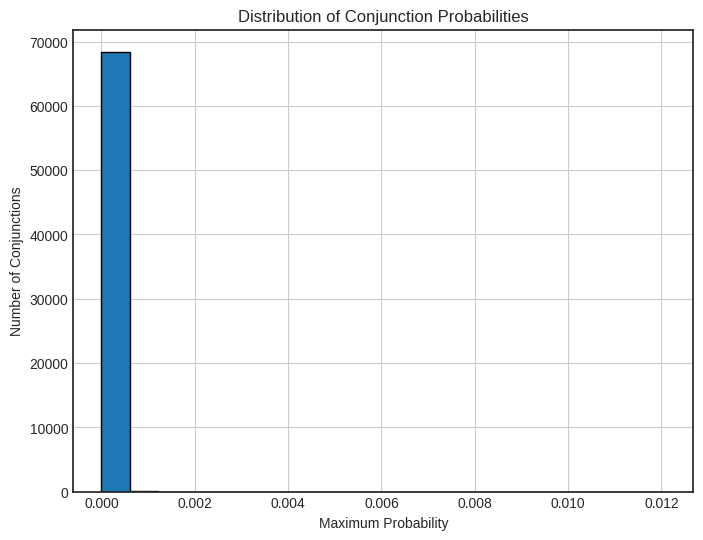

In [15]:
# 3.Distribution of Conjunction Probabilities
plt.figure(figsize=(8, 6))
df['MAX_PROB'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Conjunction Probabilities')
plt.xlabel('Maximum Probability')
plt.ylabel('Number of Conjunctions')
plt.show()


In [16]:
# 4.Dilution Threshold Analysis
dilution_thresholds = df['DILUTION'].unique()
dilution_thresholds


array([0.01 , 0.011, 0.008, ..., 3.467, 3.498, 3.322])

In [17]:
#Convert 'TCA' column to datetime format
df['ConjunctionTime'] = pd.to_datetime(df['TCA'])

# Now, 'ConjunctionTime' column contains the datetime information
print(df[['TCA', 'ConjunctionTime']])

                           TCA         ConjunctionTime
0      2023-11-10 19:41:58.190 2023-11-10 19:41:58.190
1      2023-11-16 14:43:00.723 2023-11-16 14:43:00.723
2      2023-11-16 06:09:36.351 2023-11-16 06:09:36.351
3      2023-11-14 11:26:42.273 2023-11-14 11:26:42.273
4      2023-11-15 07:09:41.444 2023-11-15 07:09:41.444
...                        ...                     ...
68506  2023-11-12 13:50:28.831 2023-11-12 13:50:28.831
68507  2023-11-16 16:57:41.997 2023-11-16 16:57:41.997
68508  2023-11-16 13:34:07.166 2023-11-16 13:34:07.166
68509  2023-11-15 13:30:12.682 2023-11-15 13:30:12.682
68510  2023-11-13 11:12:35.678 2023-11-13 11:12:35.678

[68511 rows x 2 columns]


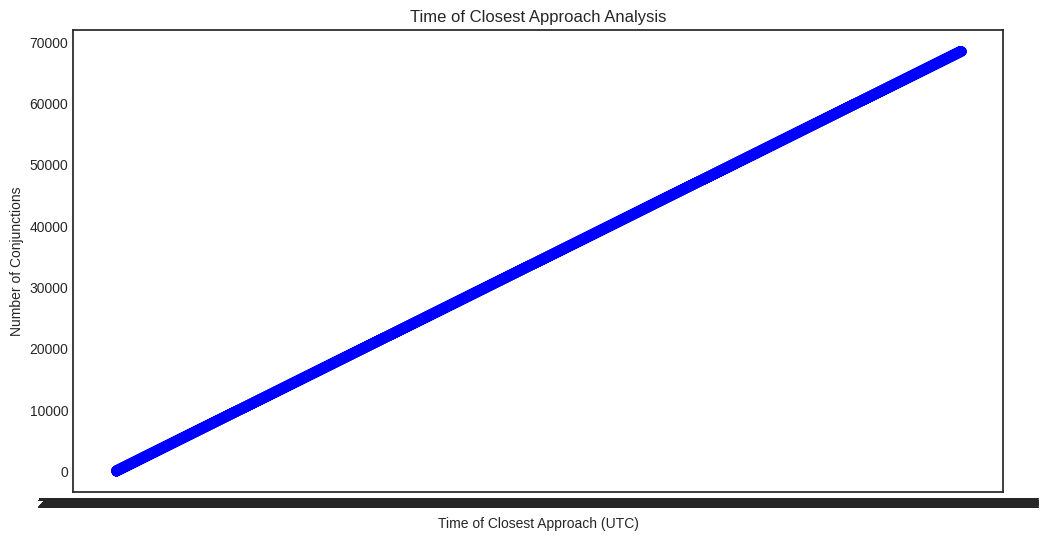

In [18]:
# 5.Time of Closest Approach Analysis
# Sort DataFrame by 'TCA'
df = df.sort_values(by='TCA')

# Plot the number of conjunctions over time
plt.figure(figsize=(12, 6))
plt.plot(df['TCA'], range(len(df)), marker='o', linestyle='-', color='b')
plt.title('Time of Closest Approach Analysis')
plt.xlabel('Time of Closest Approach (UTC)')
plt.ylabel('Number of Conjunctions')
plt.show()

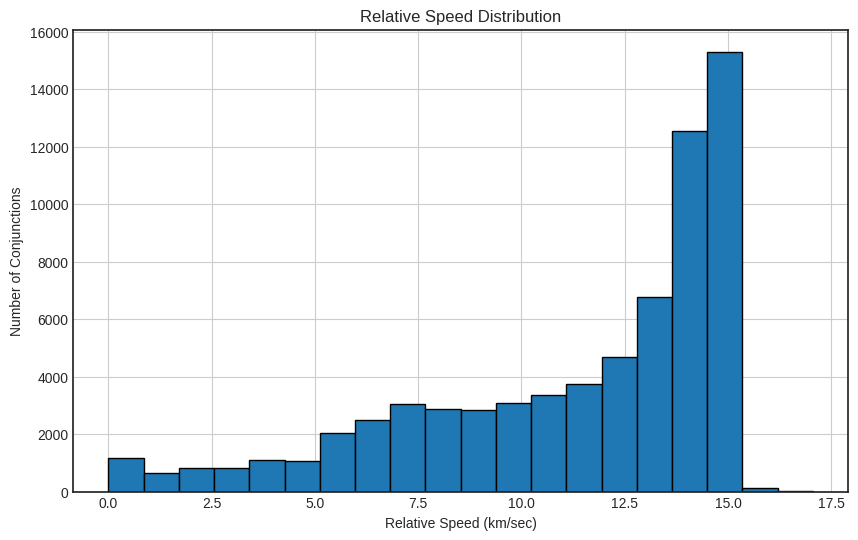

In [20]:
# 6.Relative Speed Distribution
plt.figure(figsize=(10, 6))
df['TCA_RELATIVE_SPEED'].hist(bins=20, edgecolor='black')
plt.title('Relative Speed Distribution')
plt.xlabel('Relative Speed (km/sec)')
plt.ylabel('Number of Conjunctions')
plt.show()


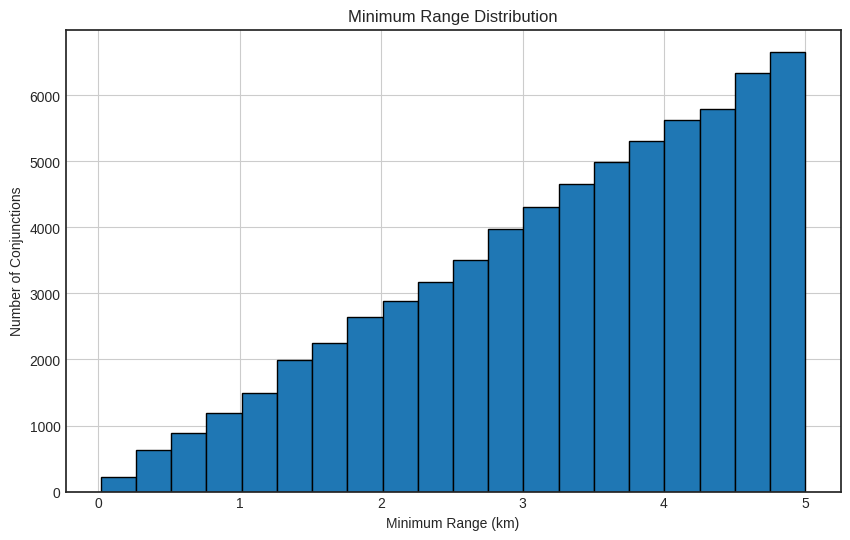

In [21]:
# 7.Minimum Range Distribution
plt.figure(figsize=(10, 6))
df['TCA_RANGE'].hist(bins=20, edgecolor='black')
plt.title('Minimum Range Distribution')
plt.xlabel('Minimum Range (km)')
plt.ylabel('Number of Conjunctions')
plt.show()

Column 'SGP4 Propagation Errors' not found in the dataset.


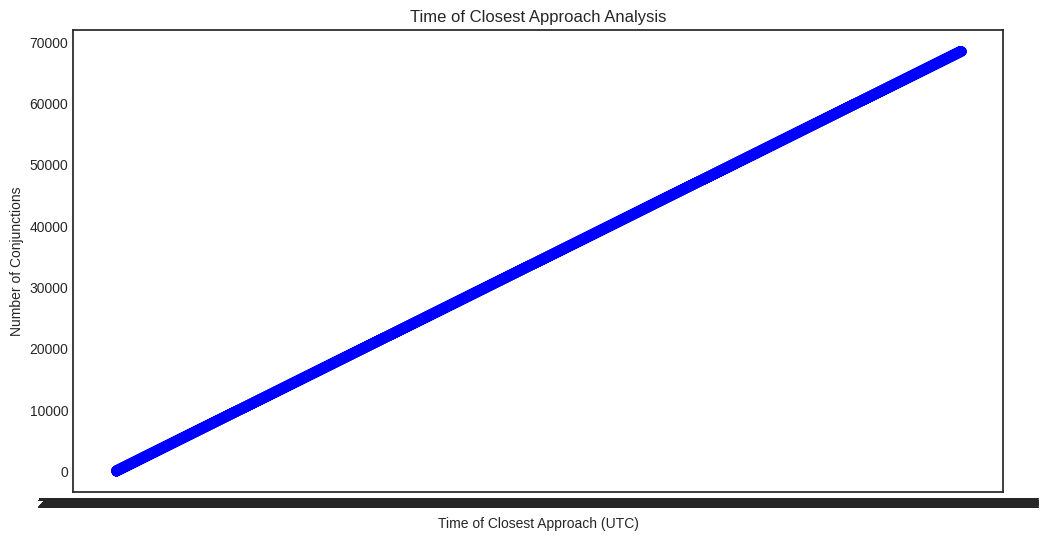

In [22]:
# 8.SGP4 Propagation Errors# Check if 'SGP4 Propagation Errors' column exists before using it
if 'SGP4 Propagation Errors' in df.columns:
    # 8. SGP4 Propagation Errors
    sgp4_errors = df['SGP4 Propagation Errors'].dropna()
    print(f"8. SGP4 Propagation Errors: {sgp4_errors}")
else:
    print("Column 'SGP4 Propagation Errors' not found in the dataset.")

# Plot the number of conjunctions over time
plt.figure(figsize=(12, 6))
plt.plot(df['TCA'], range(len(df)), marker='o', linestyle='-', color='b')
plt.title('Time of Closest Approach Analysis')
plt.xlabel('Time of Closest Approach (UTC)')
plt.ylabel('Number of Conjunctions')
plt.show()

In [24]:
# 9.Satellite Operational Status
status_columns = ['OBJECT_NAME_1', 'OBJECT_NAME_2']

# Define a function to extract the operational status
def extract_status(x):
    if pd.notna(x):
        x_str = str(x)  # Convert to string
        match = re.search(r'\[([^\]]+)\]', x_str)
        if match:
            return match.group(1)
    return 'Unknown'  # If no match or NaN, consider the status as 'Unknown'

# Apply the function to each column
status_values = df[status_columns].applymap(extract_status)

# Stack the DataFrame to create a Series
status_series = status_values.stack()

# Count the occurrences of each status
satellite_status_counts = status_series.value_counts()

print(f"9. Satellite Operational Status: \n{satellite_status_counts}")

# Plot the number of conjunctions over time
plt.figure(figsize=(12, 6))
plt.plot(df['TCA'], range(len(df)), marker='o', linestyle='-', color='b')
plt.title('Time of Closest Approach Analysis')
plt.xlabel('Time of Closest Approach (UTC)')
plt.ylabel('Number of Conjunctions')
plt.show()


NameError: ignored

In [27]:
# 9. Satellite Operational Status
status_columns = ['OBJECT_NAME_1', 'OBJECT_NAME_2']

# Define a function to extract the operational status
def extract_status(x):
    if pd.notna(x):
        match = re.search(r'\[([^\]]+)\]', x)
        if match:
            return match.group(1)
    return 'Unknown'  # If no match or NaN, consider the status as 'Unknown'

# Apply the function to each column
status_values = df[status_columns].applymap(extract_status)

# Stack the DataFrame to create a Series
status_series = status_values.stack()

# Count the occurrences of each status
satellite_status_counts = status_series.value_counts()

print(f"9. Satellite Operational Status: \n{satellite_status_counts}")

# Plot the number of conjunctions over time
plt.figure(figsize=(12, 6))
plt.plot(df['TCA'], range(len(df)), marker='o', linestyle='-', color='b')
plt.title('Time of Closest Approach Analysis')
plt.xlabel('Time of Closest Approach (UTC)')
plt.ylabel('Number of Conjunctions')
plt.show()


NameError: ignored

9. Satellite Operational Status: 
+    95040
-    36582
?     3276
P     1876
X      151
B       97
dtype: int64


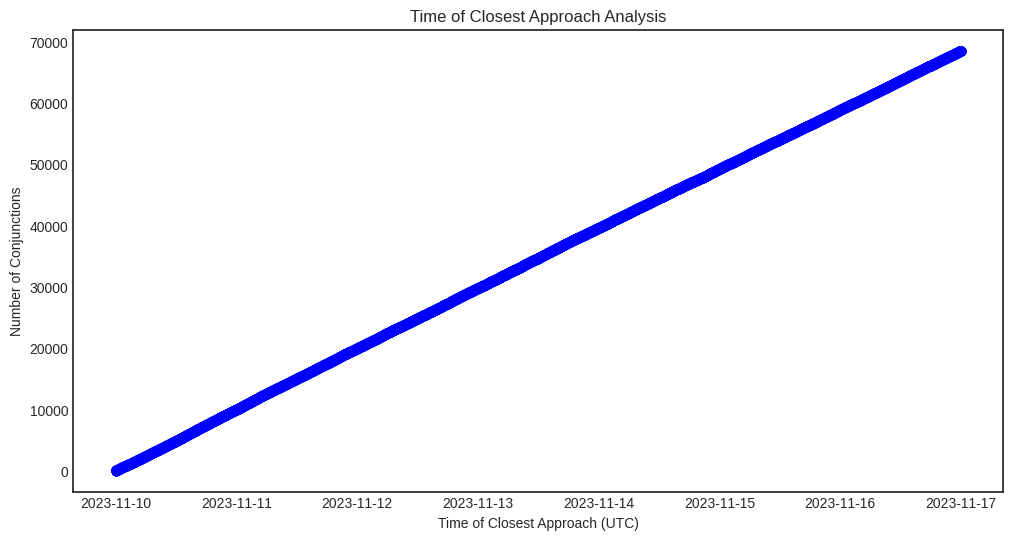

In [29]:
# 9. Satellite Operational Status
import re
status_columns = ['OBJECT_NAME_1', 'OBJECT_NAME_2']

# Define a function to extract the operational status
def extract_status(x):
    if pd.notna(x):
        match = re.search(r'\[([^\]]+)\]', x)
        if match:
            return match.group(1)
    return 'Unknown'  # If no match or NaN, consider the status as 'Unknown'

# Apply the function to each column
status_values = df[status_columns].applymap(extract_status)

# Stack the DataFrame to create a Series
status_series = status_values.stack()

# Count the occurrences of each status
satellite_status_counts = status_series.value_counts()

print(f"9. Satellite Operational Status: \n{satellite_status_counts}")

# Plot the number of conjunctions over time
plt.figure(figsize=(12, 6))
plt.plot(df['TCA'], range(len(df)), marker='o', linestyle='-', color='b')
plt.title('Time of Closest Approach Analysis')
plt.xlabel('Time of Closest Approach (UTC)')
plt.ylabel('Number of Conjunctions')
plt.show()

In [30]:
# 10.Top Conjunctions by Maximum Probability
top_conjunctions = df.sort_values(by='MAX_PROB', ascending=False).head(10)
top_conjunctions

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION,ConjunctionTime
5,46537,STARLINK-1672 [+],1.254,53815,STRIX-1 [+],0.992,2023-11-10 18:43:50.226,0.054,6.638,0.012080,0.014,2023-11-10 18:43:50.226
35,45390,STARLINK-1284 [+],5.384,45685,STARLINK-1402 [P],5.529,2023-11-14 20:08:55.741,0.107,8.991,0.007911,0.030,2023-11-14 20:08:55.741
0,46943,BRO-3 [+],1.034,56798,STARLINK-6068 [+],1.071,2023-11-10 19:41:58.190,0.017,14.823,0.006440,0.010,2023-11-10 19:41:58.190
2,57192,SITRO-AIS 6 (CHIRKIN) [+],6.431,17316,ARIANE 1 DEB [-],6.845,2023-11-16 06:09:36.351,0.023,11.982,0.005572,0.008,2023-11-16 06:09:36.351
50,47607,STARLINK-2025 [P],3.691,47824,STARLINK-2409 [+],3.707,2023-11-12 20:48:45.641,0.127,10.211,0.005290,0.039,2023-11-12 20:48:45.641
21,49745,STARLINK-3241 [+],1.715,1672,TITAN 3C TRANSTAGE DEB [-],1.718,2023-11-11 06:52:55.953,0.084,4.993,0.005288,0.021,2023-11-11 06:52:55.953
15,51792,STARLINK-3626 [+],5.005,55327,HAWK-6A [+],4.694,2023-11-14 02:58:29.069,0.079,10.408,0.004779,0.025,2023-11-14 02:58:29.069
1,57342,STARLINK-6375 [+],6.817,27226,PSLV DEB [-],8.764,2023-11-16 14:43:00.723,0.021,14.114,0.004623,0.011,2023-11-16 14:43:00.723
10,52156,OBJECT D [+],1.150,55758,STARLINK-5072 [+],1.087,2023-11-10 22:12:27.701,0.066,13.988,0.004491,0.032,2023-11-10 22:12:27.701
20,45684,STARLINK-1401 [P],0.720,57886,YAOGAN-39 02A [+],0.299,2023-11-10 00:05:41.538,0.084,10.270,0.004282,0.026,2023-11-10 00:05:41.538


In [31]:
# Display results
print(f"1. Total Number of Conjunctions: {total_conjunctions}")
print(f"2. Number of Active Satellites: {num_active_satellites}")
print(f"4. Dilution Thresholds: {dilution_thresholds}")
print(f"9. Satellite Operational Status: \n{satellite_status_counts}")
print(f"10. Top Conjunctions by Maximum Probability: \n{top_conjunctions}")

1. Total Number of Conjunctions: 68511
2. Number of Active Satellites: 15332
4. Dilution Thresholds: [0.01  0.011 0.008 ... 3.467 3.498 3.322]
9. Satellite Operational Status: 
+    95040
-    36582
?     3276
P     1876
X      151
B       97
dtype: int64
10. Top Conjunctions by Maximum Probability: 
    NORAD_CAT_ID_1              OBJECT_NAME_1  DSE_1  NORAD_CAT_ID_2  \
5            46537          STARLINK-1672 [+]  1.254           53815   
35           45390          STARLINK-1284 [+]  5.384           45685   
0            46943                  BRO-3 [+]  1.034           56798   
2            57192  SITRO-AIS 6 (CHIRKIN) [+]  6.431           17316   
50           47607          STARLINK-2025 [P]  3.691           47824   
21           49745          STARLINK-3241 [+]  1.715            1672   
15           51792          STARLINK-3626 [+]  5.005           55327   
1            57342          STARLINK-6375 [+]  6.817           27226   
10           52156               OBJECT D [+]  1.1

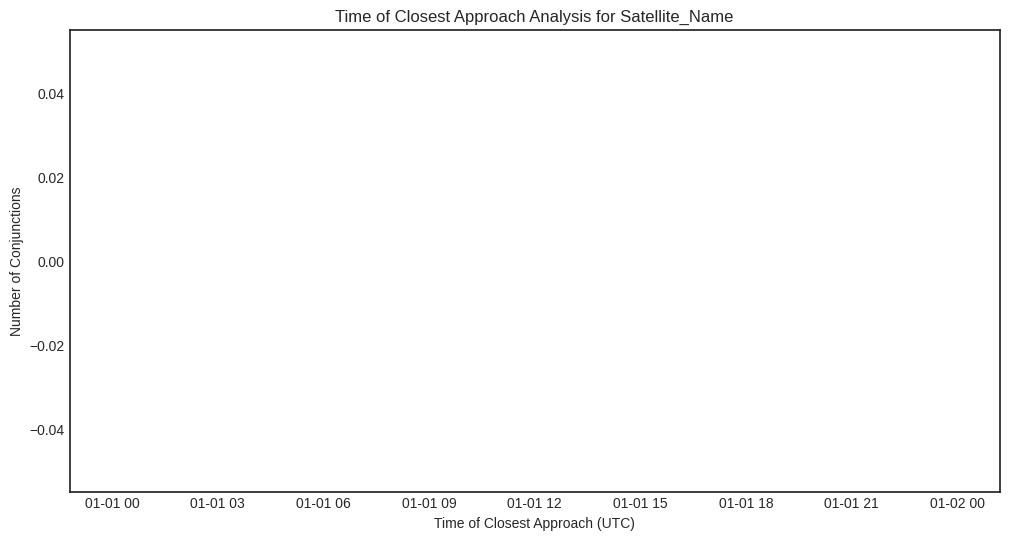

Total Conjunctions for Satellite_Name: 0
Maximum Probability: nan
Average Relative Speed: nan
Minimum Range: nan km


In [34]:
# Define the satellite name
satellite_name = 'Satellite_Name'

# Filter data for a specific satellite
filtered_df = df[(df['OBJECT_NAME_1'] == satellite_name) | (df['OBJECT_NAME_2'] == satellite_name)]

# Convert 'TCA' to datetime
filtered_df['TCA'] = pd.to_datetime(filtered_df['TCA'])

# Sort DataFrame by 'TCA'
filtered_df = filtered_df.sort_values(by='TCA')

# Plot the number of conjunctions over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['TCA'], range(len(filtered_df)), marker='o', linestyle='-', color='b')
plt.title(f'Time of Closest Approach Analysis for {satellite_name}')
plt.xlabel('Time of Closest Approach (UTC)')
plt.ylabel('Number of Conjunctions')
plt.show()

# Display additional relevant information
print(f"Total Conjunctions for {satellite_name}: {len(filtered_df)}")
print(f"Maximum Probability: {filtered_df['MAX_PROB'].max()}")
print(f"Average Relative Speed: {filtered_df['TCA_RELATIVE_SPEED'].mean()}")
print(f"Minimum Range: {filtered_df['TCA_RANGE'].min()} km")


#B) Represent the conjunctions data of a single satellite or a satellite constellation.The analytics should be intuitive, represented in an easily understandable format and should enable decision making from a satellite operator’s point of view.

In [35]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21168 sha256=e510af3da2e12cd14f9d8e2d0d26f130ecca85a1435c016e9627b14ec02de2e3
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


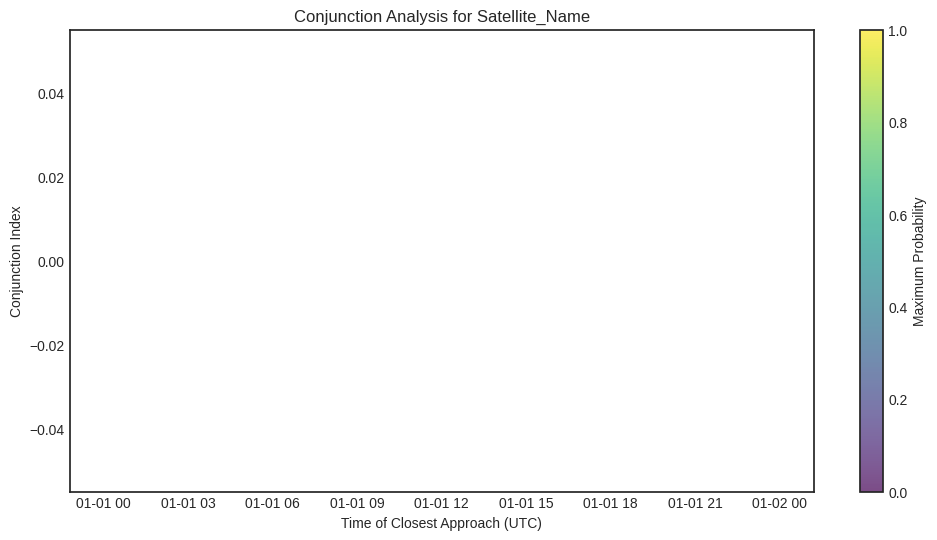

In [36]:
import mplcursors

# Filter data for a specific satellite
satellite_name = 'Satellite_Name'
filtered_df = df[(df['OBJECT_NAME_1'] == satellite_name) | (df['OBJECT_NAME_2'] == satellite_name)]

# Create a scatter plot with tooltips
plt.figure(figsize=(12, 6))
scatter = plt.scatter(filtered_df['TCA'], range(len(filtered_df)), c=filtered_df['MAX_PROB'], cmap='viridis', s=50, alpha=0.7)
plt.title(f'Conjunction Analysis for {satellite_name}')
plt.xlabel('Time of Closest Approach (UTC)')
plt.ylabel('Conjunction Index')

# Add colorbar
cbar = plt.colorbar(scatter, label='Maximum Probability')

# Add tooltips
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Index: {sel.target[0]:.0f}\nMax Probability: {filtered_df.iloc[int(sel.target[0])]['MAX_PROB']:.4f}\n"
    f"Relative Speed: {filtered_df.iloc[int(sel.target[0])]['TCA_RELATIVE_SPEED']:.4f} km/s\n"
    f"Range: {filtered_df.iloc[int(sel.target[0])]['TCA_RANGE']:.4f} km"
))

plt.show()


#Question 2
Use the whole dataset that spans about five days. Derive analytics and visualise the
data/analytics accounting for the evolution from the first day (for e.g. the number of
conjunctions of the RSO having NORAD ID 12345 over 7 days of analysis)

In [37]:
# Convert 'DSE' to timedelta for time-based analysis
df['DSE'] = pd.to_timedelta(df['DSE_1'], unit='D')

# Set the time range for the analysis (replace with the actual start and end times)
start_time = pd.to_timedelta(0, unit='D')  # Start time (0 days)
end_time = pd.to_timedelta(5, unit='D')  # End time (5 days)

# Filter data for the specified time range
filtered_df = df[(df['DSE_1'] >= 0.144) & (df['DSE_1'] <= 32.001)]

# Display the extracted dataset
print(filtered_df)


       NORAD_CAT_ID_1          OBJECT_NAME_1  DSE_1  NORAD_CAT_ID_2  \
29034           42959        IRIDIUM 119 [+]  0.609           42116   
30317           58141      YAOGAN-39 04A [+]  0.860           27692   
20747           56535      STARLINK-6309 [+]  0.421           39432   
40998           48273  LEMUR-2-SPECIAL-K [+]  0.816           34055   
15756           57018           OBJECT Q [+]  0.512           40602   
...               ...                    ...    ...             ...   
37122           43480        IRIDIUM 147 [+]  7.417           20439   
41998           58117     STARLINK-30601 [+]  7.166           43014   
67537           42837  LEMUR-2-GREENBERG [+]  7.508           55656   
38780           39089            NEOSSAT [+]  7.490           57577   
54489           47539        FLOCK 4S-24 [+]  7.869           52418   

               OBJECT_NAME_2   DSE_2                     TCA  TCA_RANGE  \
29034    COSMOS 1275 DEB [-]   1.975 2023-11-10 00:00:00.716      3.250 

In [57]:
# Inspect the 'TCA' column to find the time range
earliest_date = df['TCA'].min()
latest_date = df['TCA'].max()

# Determine the start and end dates
start_date = earliest_date
end_date = latest_date

# Print the start and end dates for reference
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2023-11-10 00:00:00.716000
End Date: 2023-11-16 23:59:50.867000


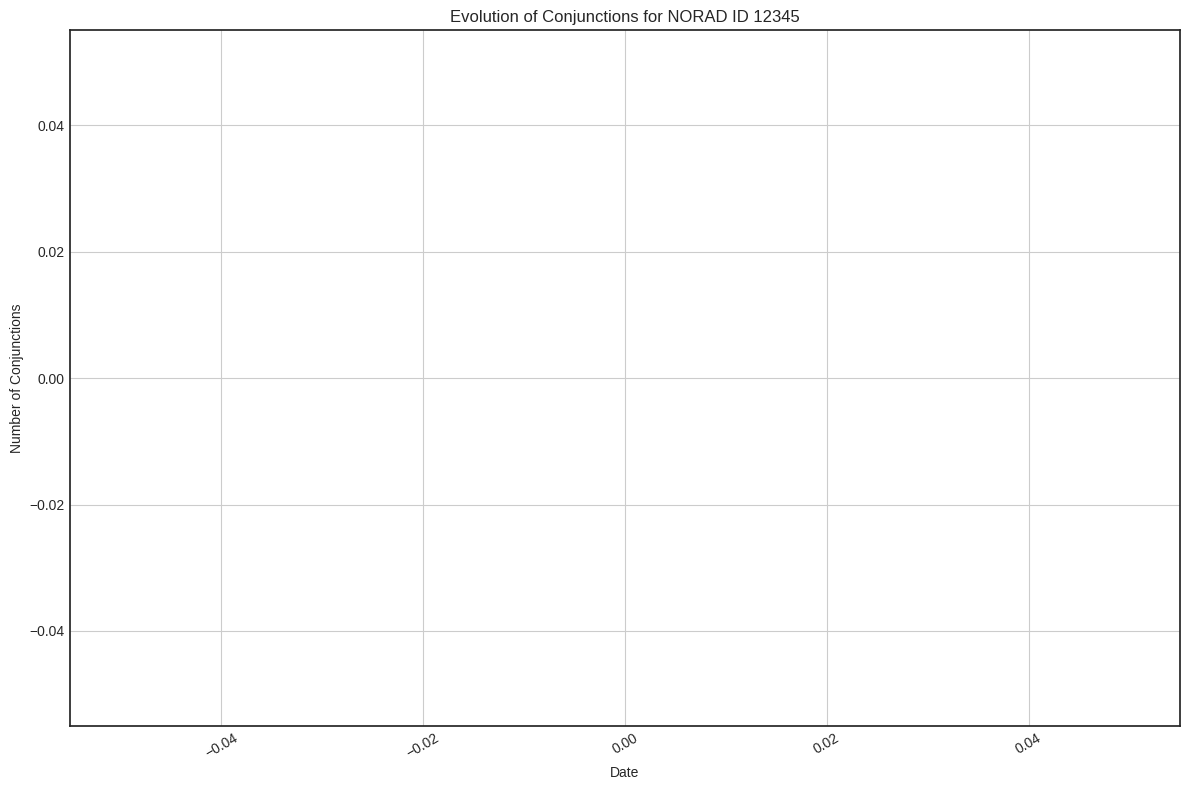

In [58]:
# Filter Data for the Desired Time Frame
start_date = pd.to_datetime("2023-11-10 00:00:00.716000")
end_date = pd.to_datetime("2023-11-16 23:59:50.867000")
filtered_df = df[(df['TCA'] >= start_date) & (df['TCA'] <= end_date)]

# Filter Data for Specific NORAD Catalog Number
norad_12345_df = filtered_df[(filtered_df['NORAD_CAT_ID_1'] == 12345) | (filtered_df['NORAD_CAT_ID_2'] == 12345)]

# Group Data by Date and Count Conjunctions per Day
conjunctions_per_day = norad_12345_df.groupby(norad_12345_df['TCA'].dt.date).size().reset_index(name='NumConjunctions')

# Visualize the Evolution
plt.figure(figsize=(12, 8))
plt.plot(conjunctions_per_day['TCA'], conjunctions_per_day['NumConjunctions'], marker='o', linestyle='-')
plt.title('Evolution of Conjunctions for NORAD ID 12345')
plt.xlabel('Date')
plt.ylabel('Number of Conjunctions')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()